In [2]:
import numpy
import random
import math
import matplotlib.pyplot as plt
from IPython.display import HTML

H=1
B=0.0
GRIDSIZE=20

def self_energy(arr):
    return -H*numpy.sum(arr*(numpy.roll(arr, 1, 0)
                             +numpy.roll(arr, 1, 1)))

def external_energy(arr):
    return -B*numpy.sum(arr)

def update(arr, T):
    idxx, idxy = numpy.random.choice(GRIDSIZE, 2)
    # what's the current energy?
    e0 = self_energy(arr)+external_energy(arr)
    # what's the energy if I flip?
    arr[idxx, idxy]*=-1
    e1 = self_energy(arr)+external_energy(arr)
    # if new energy is lower, then accept. if new energy is higher,
    # accept according to ratio of Boltzmann factors.
    if e1 < e0:
        pass
    else:
        if math.exp(-(e1-e0)/T) < random.random():
            # fails
            arr[idxx, idxy]*=-1
    
arr = numpy.random.choice([1, -1], size=(GRIDSIZE,GRIDSIZE))

In [115]:
self_energy(arr)

12

In [116]:
external_energy(arr)

-0.0

In [117]:
for _ in range(1000): update(arr, 0.05)

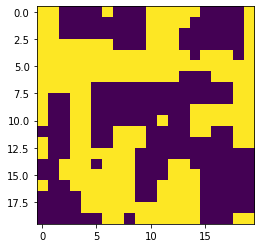

In [118]:
plt.imshow(arr)

In [4]:
NSKIP=200
NFRAMES=300
TEMP=0.1
from matplotlib.animation import FuncAnimation
fig,ax=plt.subplots(1,2,figsize=(16,6))
arr = numpy.random.choice([1, -1], size=(GRIDSIZE,GRIDSIZE))
o1 = ax[0].imshow(arr)
t, m = [], []
o2, = ax[1].plot(t,m)
ax[1].axhline(math.tanh(B/TEMP), color='r')
ax[1].set_xlim(0,NFRAMES*NSKIP)
ax[1].set_ylim(-1,1)

def animate(i):
    for _ in range(NSKIP): update(arr, TEMP)
    o1.set_data(arr)
    t.append(i*NSKIP); m.append(numpy.mean(arr))
    o2.set_data(t,m)
    
anim=FuncAnimation(fig, animate, frames=NFRAMES)
plt.close()
HTML(anim.to_jshtml(fps=40))